In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/health-insurance-cross-sell-prediction/train.csv
/kaggle/input/health-insurance-cross-sell-prediction/test.csv
/kaggle/input/health-insurance-cross-sell-prediction/sample_submission.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, cohen_kappa_score

In [3]:
df = pd.read_csv('/kaggle/input/health-insurance-cross-sell-prediction/train.csv')
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


No null values present in the dataset

In [5]:
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


### Exploratory Data Analysis

In [6]:
sns.set(style='whitegrid')

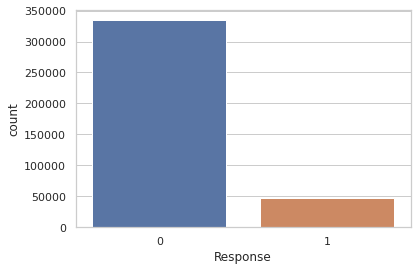

In [7]:
sns.countplot(df['Response'])

We can clearly see that the dataset is highly unbalanced in nature. We shall need to take the correct steps to ensure that this unbalanced nature  does not affect our final model.

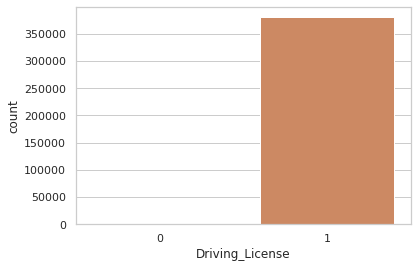

In [8]:
sns.countplot(df['Driving_License'])

In [9]:
df[df['Driving_License'] == 0].describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,812.000000,812.000000,812.0,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000
mean,191896.698276,65.604680,0.0,26.698276,0.296798,34999.727833,60.736453,155.883005,0.050493
std,109366.149515,10.479509,0.0,12.087692,0.457128,18510.698918,48.791077,82.896574,0.219094
min,564.000000,21.000000,0.0,0.000000,0.000000,2630.000000,3.000000,10.000000,0.000000
25%,105484.250000,59.750000,0.0,21.750000,0.000000,27091.500000,26.000000,83.750000,0.000000
50%,193245.000000,67.000000,0.0,28.000000,0.000000,35767.500000,26.000000,156.000000,0.000000
75%,285495.750000,74.000000,0.0,29.000000,1.000000,46024.250000,124.000000,231.250000,0.000000
max,380918.000000,85.000000,0.0,50.000000,1.000000,111683.000000,163.000000,298.000000,1.000000


We see that it's mostly the retired citizens (age>65) who do not possess a driving license.

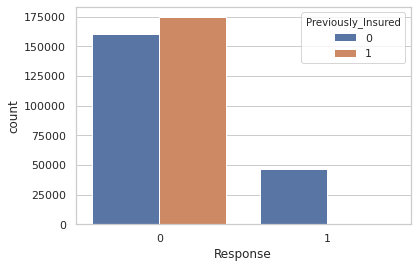

In [10]:
sns.countplot(df['Response'], hue=df['Previously_Insured'])

Thus everyone who gave a positive (1) reponse was a new customer or was getting insured the first time

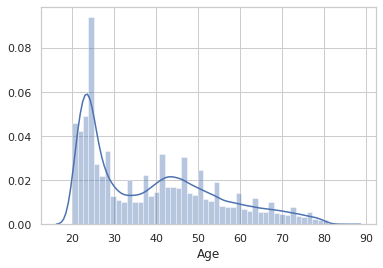

In [11]:
sns.distplot(df['Age'])

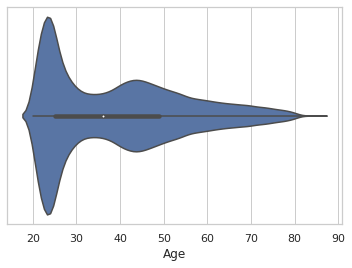

In [12]:
sns.violinplot(df['Age'])

1. Most of the people buy a car from the age-group (20-30) and get their insurance done.
2. Again in age-group (40-50) people buy cars (After saving money, or a part of their retirement plan)

Taking a look at the 'Gender' column

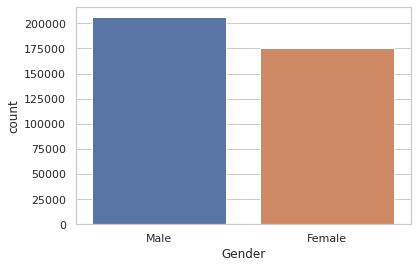

In [13]:
sns.countplot(df['Gender'])

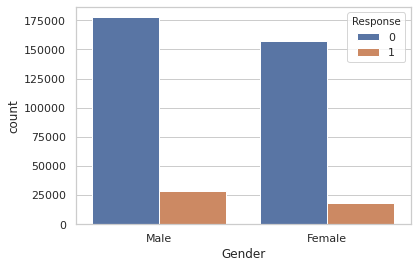

In [14]:
sns.countplot(df['Gender'], hue=df['Response'])

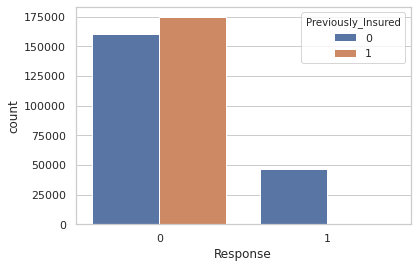

In [15]:
sns.countplot(df['Response'] ,hue=df['Previously_Insured'])

Most of the customers who gave a positive response were not previously insured. This can also be a good point to research on.

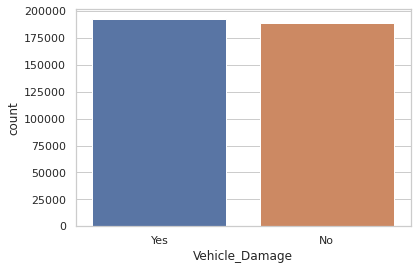

In [16]:
sns.countplot(df['Vehicle_Damage'])

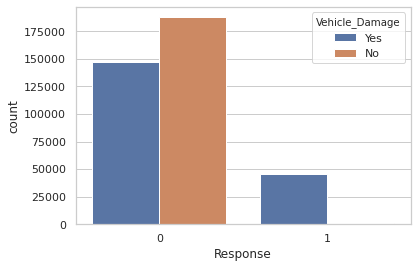

In [17]:
sns.countplot(df['Response'], hue=df['Vehicle_Damage'])

From this plot we can see that all customers which gave a postive response had a **Vehical Damage**

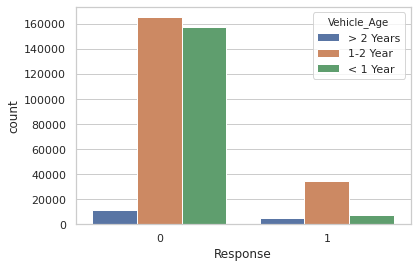

In [18]:
sns.countplot(df['Response'], hue=df['Vehicle_Age'])

We cannot make any good guess from the 'Vehicle_Age' column.
#### Let's try looking at the numeric(continuous) features

In [19]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [20]:
df.groupby('Region_Code')['Response'].agg('mean').sort_values().head(10)

Region_Code
44.0    0.040842
25.0    0.042749
10.0    0.060128
50.0    0.062677
22.0    0.063407
16.0    0.066766
6.0     0.069904
17.0    0.070310
21.0    0.071027
2.0     0.071075
Name: Response, dtype: float64

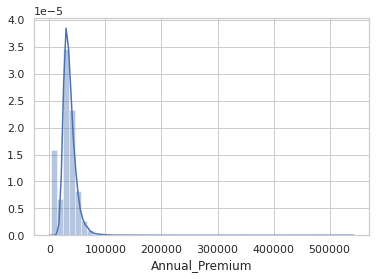

In [21]:
sns.distplot(df['Annual_Premium'])

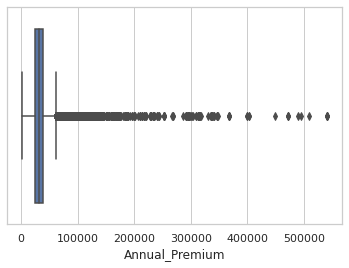

In [22]:
sns.boxplot(df['Annual_Premium'])

The annual premium has a lot of outliers, let's check if they are interesting

In [56]:
df['Annual_Premium'].describe()

count    381109.000000
mean      30564.389581
std       17213.155057
min        2630.000000
25%       24405.000000
50%       31669.000000
75%       39400.000000
max      540165.000000
Name: Annual_Premium, dtype: float64

In [57]:
high_premium = df[df['Annual_Premium'] >39400.00]
high_premium.describe()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,AgeOneYear,AgeTwoYears,Vehicle_Damage
count,95277.000000,95277.000000,95277.000000,95277.000000,95277.000000,95277.000000,95277.000000,95277.000000,95277.000000,95277.000000,95277.000000,95277.000000,95277.000000
mean,190994.687364,0.561699,42.819295,0.996515,25.741291,0.403560,49956.072788,97.674423,154.330300,0.145670,0.332609,0.074310,0.566821
std,110399.271026,0.496181,16.326561,0.058928,11.063824,0.490614,14671.078627,56.536496,83.674813,0.352777,0.471150,0.262276,0.495517
min,1.000000,0.000000,20.000000,0.000000,0.000000,0.000000,39401.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000
25%,95048.000000,0.000000,26.000000,1.000000,21.000000,0.000000,42355.000000,26.000000,82.000000,0.000000,0.000000,0.000000,0.000000
50%,191448.000000,1.000000,43.000000,1.000000,28.000000,0.000000,46249.000000,124.000000,154.000000,0.000000,0.000000,0.000000,1.000000
75%,286992.000000,1.000000,55.000000,1.000000,28.000000,1.000000,52895.000000,152.000000,227.000000,0.000000,1.000000,0.000000,1.000000
max,381109.000000,1.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000,1.000000,1.000000,1.000000


In [61]:
print(df['Response'].value_counts())

0    334399
1     46710
Name: Response, dtype: int64


0    81398
1    13879
Name: Response, dtype: int64


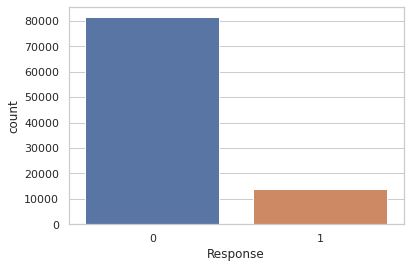

In [60]:
print(high_premium['Response'].value_counts())
sns.countplot(high_premium['Response'])

So, we can see that nearly 30% customers who gave a positive response are high premium customers.
Thus we can include a feature that checks if a customer is having high premium or not.

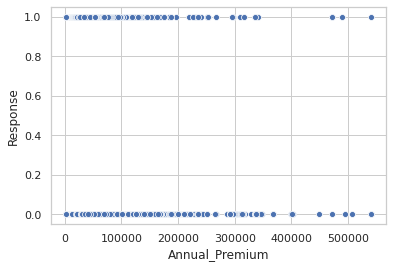

In [23]:
sns.scatterplot(df['Annual_Premium'], df['Response'])

### Data Preprocessing

In [24]:
# gender
df['Gender'] = df['Gender'].map({'Female':0, 'Male':1}).astype('int')

In [25]:
df=pd.get_dummies(df, drop_first=True)

In [26]:
df = df.rename(columns = {'Vehicle_Age_< 1 Year':'AgeOneYear',
                          'Vehicle_Age_> 2 Years':'AgeTwoYears',
                          'Vehicle_Damage_Yes':'Vehicle_Damage'})

In [27]:
df['AgeOneYear'] = df['AgeOneYear'].astype('int')
df['AgeTwoYears'] = df['AgeTwoYears'].astype('int')
df['Vehicle_Damage'] = df['Vehicle_Damage'].astype('int')

In [63]:
df['HighPremium'] = np.where(df['Annual_Premium'] > 39400.00, 1, 0)

In [64]:
df.describe()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,AgeOneYear,AgeTwoYears,Vehicle_Damage,HighPremium
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,0.540761,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563,0.432385,0.042001,0.504877,0.249999
std,110016.836208,0.498336,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936,0.495408,0.200592,0.499977,0.433013
min,1.000000,0.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,95278.000000,0.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,190555.000000,1.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,285832.000000,1.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,381109.000000,1.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [65]:
X = df.drop(['id', 'Response'], axis=1)
y = df['Response']

X_train,X_test,y_train,y_test = train_test_split(X,y, random_state = 0, stratify=y)

In [66]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

### Model Building

In [31]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression

### 1. Logistic Regression

In [ ]:
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l1','l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)

grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=3, scoring='f1',error_score=0)
grid_result = grid_search.fit(X_train_sc, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

In [67]:
lr = LogisticRegression(C=10, class_weight='balanced')
lr.fit(X_train_sc, y_train)

y_pred = lr.predict(X_test_sc)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.59      0.74     83600
           1       0.25      0.97      0.40     11678

    accuracy                           0.64     95278
   macro avg       0.62      0.78      0.57     95278
weighted avg       0.90      0.64      0.70     95278



In [68]:
print(confusion_matrix(y_test, y_pred))

[[49687 33913]
 [  327 11351]]


Feature: 0, Score: 0.11402
Feature: 1, Score: -1.66545
Feature: 2, Score: 1.16161
Feature: 3, Score: -0.02174
Feature: 4, Score: -3.97268
Feature: 5, Score: 1.04145
Feature: 6, Score: -0.40995
Feature: 7, Score: -0.00280
Feature: 8, Score: -1.15503
Feature: 9, Score: 0.18225
Feature: 10, Score: 2.03179
Feature: 11, Score: -0.01785


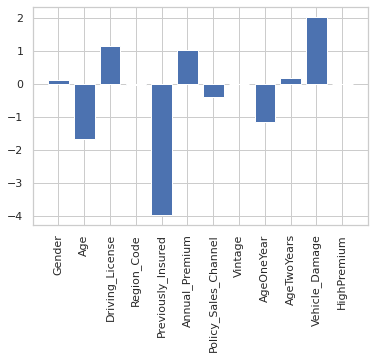

In [69]:
# get importance
importance = lr.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in X_train.columns], importance)
plt.xticks(rotation=90)
plt.show()

In [48]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc


# plot no skill and model precision-recall curves
def plot_pr_curve(y_test, model_probs):
    # calculate the no skill line as the proportion of the positive class
    no_skill = len(y_test[y_test==1]) / len(y_test)
    # plot the no skill precision-recall curve
    plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
    # plot model precision-recall curve
    precision, recall, thresholds = precision_recall_curve(y_test, model_probs)
    # convert to f score
#     fscore = (2 * precision * recall) / (precision + recall)
#     # locate the index of the largest f score
#     ix = np.argmax(fscore)
#     print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))
    plt.plot(recall, precision, marker='.', label='Logistic')
    #plt.scatter(recall[ix], precision[ix], marker='o', color='black', label='Best')
    # axis labels
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    # show the legend
    plt.legend()
    # show the plot
    plt.show()

Logistic PR AUC: 0.317
Best Threshold=0.881075, F-Score=nan


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  


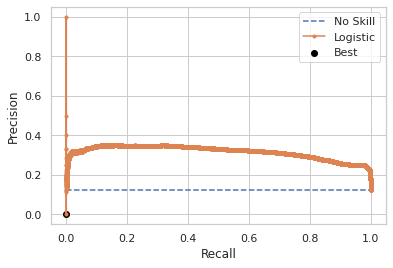

In [36]:
yhat = lr.predict_proba(X_test_sc)
model_probs = yhat[:, 1]
# calculate the precision-recall auc
precision, recall, _ = precision_recall_curve(y_test, model_probs)
auc_score = auc(recall, precision)
print('Logistic PR AUC: %.3f' % auc_score)
# plot precision-recall curves
plot_pr_curve(y_test, model_probs)

In [39]:
from sklearn.metrics import roc_auc_score, roc_curve

print('Area under curve score for Logistic Regression is: ', roc_auc_score(y_test, y_pred))

Area under curve score for Logistic Regression is:  0.7830727747590651


2. Random Forests

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [70]:
rf1 = RandomForestClassifier(n_estimators=300, max_depth=8, min_samples_split=4,
                             max_features='auto', bootstrap=True, min_samples_leaf=4,
                            class_weight='balanced_subsample')
rf1.fit(X_train, y_train)
y_pred = rf1.predict(X_test)

In [71]:
print(confusion_matrix(y_train, rf1.predict(X_train)))
print('Accuracy of our model is: ', accuracy_score(y_train, rf1.predict(X_train)))

[[164772  86027]
 [  2210  32822]]
Accuracy of our model is:  0.69129660533672


In [73]:
print(confusion_matrix(y_test, y_pred))
print('Accuracy of our model is: ', accuracy_score(y_test, y_pred))

[[55020 28580]
 [  794 10884]]
Accuracy of our model is:  0.6917021767879259


In [74]:
print(classification_report(y_test, y_pred))
print('Area under curve score for Random Forests is: ', roc_auc_score(y_test, y_pred))
print('Kappa score for Random Forests',cohen_kappa_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.66      0.79     83600
           1       0.28      0.93      0.43     11678

    accuracy                           0.69     95278
   macro avg       0.63      0.80      0.61     95278
weighted avg       0.90      0.69      0.74     95278

Area under curve score for Random Forests is:  0.7950714384631963
Kappa score for Random Forests 0.29164624598500133


Logistic PR AUC: 0.367


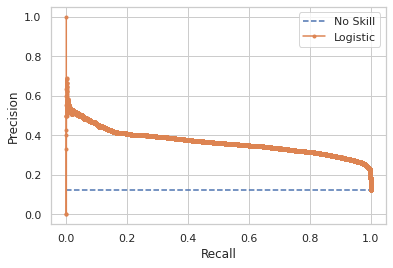

In [49]:
yhat = rf1.predict_proba(X_test)
model_probs = yhat[:, 1]
# calculate the precision-recall auc
precision, recall, _ = precision_recall_curve(y_test, model_probs)
auc_score = auc(recall, precision)
print('Logistic PR AUC: %.3f' % auc_score)
# plot precision-recall curves
plot_pr_curve(y_test, model_probs)

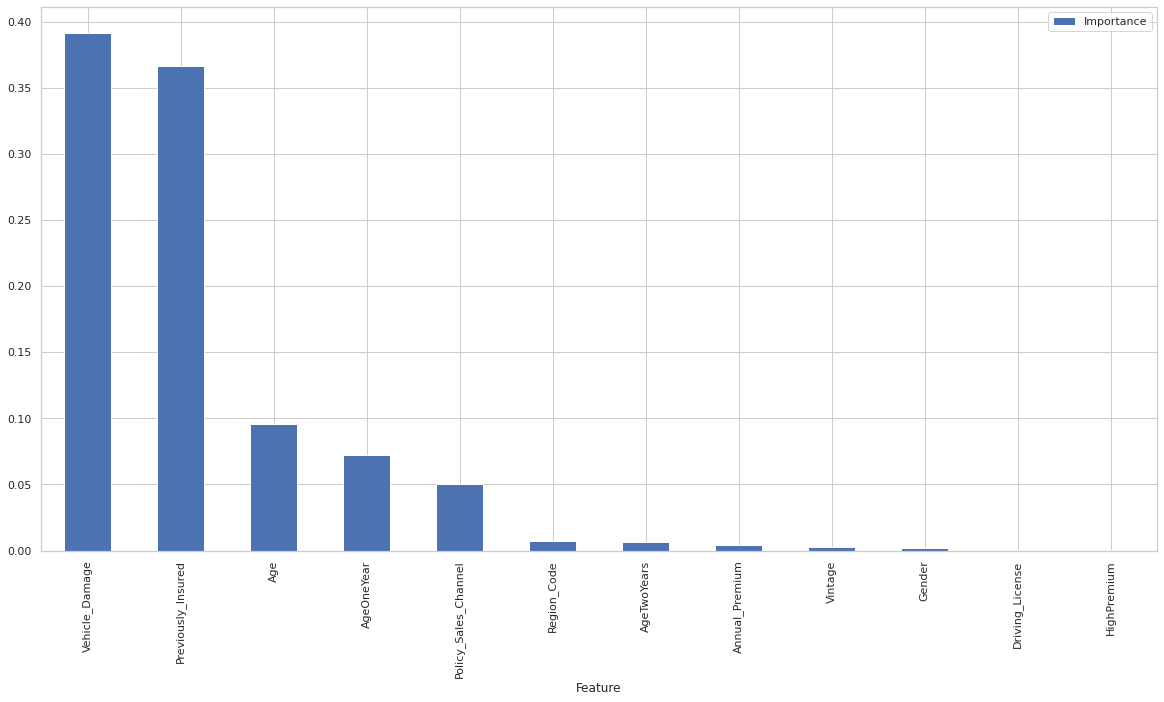

In [75]:
features = pd.DataFrame()
features['Feature'] = X_train.columns
features['Importance'] = rf1.feature_importances_
features.sort_values(by=['Importance'], ascending=False, inplace=True)
features.set_index('Feature', inplace=True)
features.plot(kind='bar', figsize=(20, 10))

Plotting AUC-ROC curves for both Random Forest and Logistic Regression

AUC for Logistic Regression 0.8351645914781894 AUC for Random Forests 0.8549214729000099


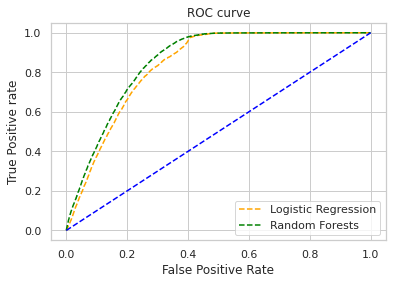

In [53]:
# predict probabilities
pred_prob1 = lr.predict_proba(X_test_sc)
pred_prob2 = rf1.predict_proba(X_test)

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

# auc scores
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
auc_score2 = roc_auc_score(y_test, pred_prob2[:,1])

print('AUC for Logistic Regression', auc_score1, 
      'AUC for Random Forests', auc_score2)

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='Random Forests')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

#### Let's also try a simple Gradient Boost classifier

In [54]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier(n_estimators=200, min_samples_split=5,max_depth=6,
                                max_features = 'auto')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [55]:
print(confusion_matrix(y_test, y_pred))
print('Accuracy of our model is: ', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('Area under curve score for GBM is: ', roc_auc_score(y_test, y_pred))
print('Kappa score for GBM',cohen_kappa_score(y_test, y_pred))

[[83384   216]
 [11471   207]]
Accuracy of our model is:  0.8773378954218183
              precision    recall  f1-score   support

           0       0.88      1.00      0.93     83600
           1       0.49      0.02      0.03     11678

    accuracy                           0.88     95278
   macro avg       0.68      0.51      0.48     95278
weighted avg       0.83      0.88      0.82     95278

Area under curve score for GBM is:  0.5075709529471439
Kappa score for GBM 0.025864783909297584


## The End

Please upvote if this notebook was of any use to you. Feel free to comment.